In [ ]:
# If running in Google Colab, run this cell first to upload the CSV from your local machine.
from google.colab import files
uploaded = files.upload()

filename = next(iter(uploaded.keys()))
print("Uploaded file:", filename)


Saving mushrooms 2.csv to mushrooms 2.csv
Uploaded file: mushrooms 2.csv


In [ ]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,5)
sns.set(style='whitegrid')


Shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g



Columns: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Data types:
 class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color 

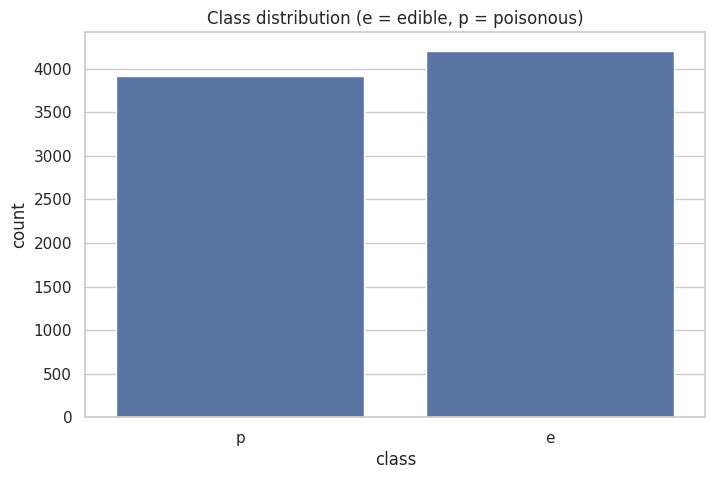

In [ ]:
# Load CSV into a DataFrame
df = pd.read_csv(filename)
print("Shape:", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Basic target distribution
print("\nTarget distribution:")
print(df['class'].value_counts())
sns.countplot(x='class', data=df)
plt.title('Class distribution (e = edible, p = poisonous)')
plt.show()


In [ ]:
# Show unique values per column (helpful for categorical features)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique -> {sorted(df[col].unique())[:20]}{'...' if df[col].nunique()>20 else ''}")

class: 2 unique -> ['e', 'p']
cap-shape: 6 unique -> ['b', 'c', 'f', 'k', 's', 'x']
cap-surface: 4 unique -> ['f', 'g', 's', 'y']
cap-color: 10 unique -> ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
bruises: 2 unique -> ['f', 't']
odor: 9 unique -> ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
gill-attachment: 2 unique -> ['a', 'f']
gill-spacing: 2 unique -> ['c', 'w']
gill-size: 2 unique -> ['b', 'n']
gill-color: 12 unique -> ['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
stalk-shape: 2 unique -> ['e', 't']
stalk-root: 5 unique -> ['?', 'b', 'c', 'e', 'r']
stalk-surface-above-ring: 4 unique -> ['f', 'k', 's', 'y']
stalk-surface-below-ring: 4 unique -> ['f', 'k', 's', 'y']
stalk-color-above-ring: 9 unique -> ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
stalk-color-below-ring: 9 unique -> ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
veil-type: 1 unique -> ['p']
veil-color: 4 unique -> ['n', 'o', 'w', 'y']
ring-number: 3 unique -> ['n', 'o', 't']
ring-type: 5 unique

### **Label Encoding (fast, lower-dim)**

In [ ]:
# Copy dataset
data_le = df.copy()

# Label encode every column (including target)
le_dict = {}
for col in data_le.columns:
    le = LabelEncoder()
    data_le[col] = le.fit_transform(data_le[col])
    le_dict[col] = le  # keep encoders if you need to inverse transform

# show result
display(data_le.head())


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### **One-Hot Encoding (for KNN, SVM, NB with numerical inputs)**

In [ ]:
# One-hot encode features (excluding target)
X = df.drop(columns=['class'])
y = df['class']

X_ohe = pd.get_dummies(X, drop_first=False)  # don't drop all to preserve categories
print("One-hot shape:", X_ohe.shape)
display(X_ohe.head())


One-hot shape: (8124, 117)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
# Choose which feature set to use:
# For tree models choose data_le; for others choose X_ohe

# For encoded-by-label (tree friendly)
X_le = data_le.drop(columns=['class'])
y_le = data_le['class']
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(X_le, y_le, test_size=0.2, random_state=42, stratify=y_le)

# For one-hot (distance & linear friendly)
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe, y, test_size=0.2, random_state=42, stratify=y)

print("Label-encoded shapes:", X_le_train.shape, X_le_test.shape)
print("One-hot shapes:", X_ohe_train.shape, X_ohe_test.shape)


Label-encoded shapes: (6499, 22) (1625, 22)
One-hot shapes: (6499, 117) (1625, 117)


# **Outlier detection (categorical data)**

In [ ]:
# 6A: Rare categories (per feature)
rare_threshold = 0.01  # categories with <1% frequency flagged
rare_info = {}
for col in df.columns.drop('class'):
    freqs = df[col].value_counts(normalize=True)
    rare = freqs[freqs < rare_threshold]
    if not rare.empty:
        rare_info[col] = rare.to_dict()
print("Features with rare categories (<1%):")
for k,v in rare_info.items():
    print(k, v)

# 6B: Using OHE + PCA + z-score to find numeric outliers (optional)------>(i will not remove it because we have small dataset also mushroom has already diverse data)
from sklearn.decomposition import PCA
from scipy import stats

X_ohe_for_outlier = X_ohe.copy()
pca = PCA(n_components=5, random_state=42)  # compress to 5 components
pc = pca.fit_transform(X_ohe_for_outlier)
# compute z-score across principal components
zscores = np.abs(stats.zscore(pc))
outlier_mask = (zscores > 3).any(axis=1)  # any PC > 3 std dev
print("Potential outlier rows (PCA+zscore):", outlier_mask.sum())


Features with rare categories (<1%):
cap-shape {'s': 0.003938946331856229, 'c': 0.0004923682914820286}
cap-surface {'g': 0.0004923682914820286}
cap-color {'c': 0.0054160512063023145, 'u': 0.0019694731659281144, 'r': 0.0019694731659281144}
odor {'m': 0.004431314623338257}
gill-color {'o': 0.007877892663712457, 'r': 0.0029542097488921715}
stalk-surface-above-ring {'y': 0.0029542097488921715}
stalk-color-above-ring {'c': 0.004431314623338257, 'y': 0.0009847365829640572}
stalk-color-below-ring {'c': 0.004431314623338257, 'y': 0.0029542097488921715}
veil-color {'y': 0.0009847365829640572}
ring-number {'n': 0.004431314623338257}
ring-type {'f': 0.005908419497784343, 'n': 0.004431314623338257}
spore-print-color {'r': 0.008862629246676515, 'u': 0.005908419497784343, 'o': 0.005908419497784343, 'y': 0.005908419497784343, 'b': 0.005908419497784343}
Potential outlier rows (PCA+zscore): 181


# ***Note***
I will not remove outliers because we have small dataset also mushroom has already diverse data

# **Modeling: define models and helper functions**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.svm import SVC

models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "CategoricalNB": CategoricalNB(),  # works with integer-encoded categorical data
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

def evaluate_model(m, X_train, X_test, y_train, y_test):
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, pos_label='p') if y_test.dtype == object else precision_score(y_test, preds)
    rec = recall_score(y_test, preds, pos_label='p') if y_test.dtype == object else recall_score(y_test, preds)
    f1 = f1_score(y_test, preds, pos_label='p') if y_test.dtype == object else f1_score(y_test, preds)
    print(f"Model: {m.__class__.__name__}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1:", f1)
    print("\nClassification report:\n", classification_report(y_test, preds))
    # Confusion matrix plot
    cm = confusion_matrix(y_test, preds, labels=np.unique(y_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion matrix: {m.__class__.__name__}")
    plt.show()
    return {"model": m, "accuracy": acc, "precision": prec, "recall": rec, "f1": f1}


# **Train & evaluate models (for label-encoded features)**

---- DecisionTree ----
Model: DecisionTreeClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



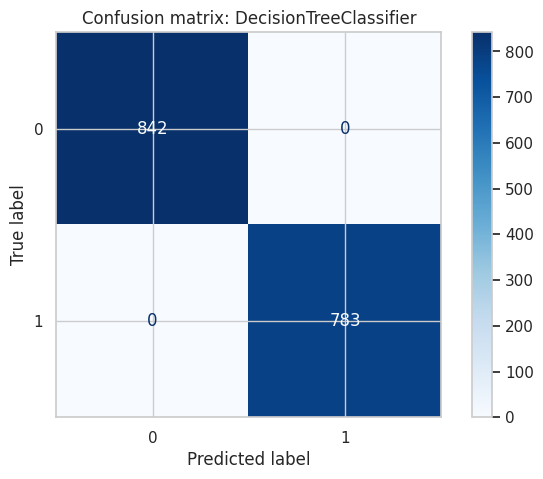

---- RandomForest ----
Model: RandomForestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



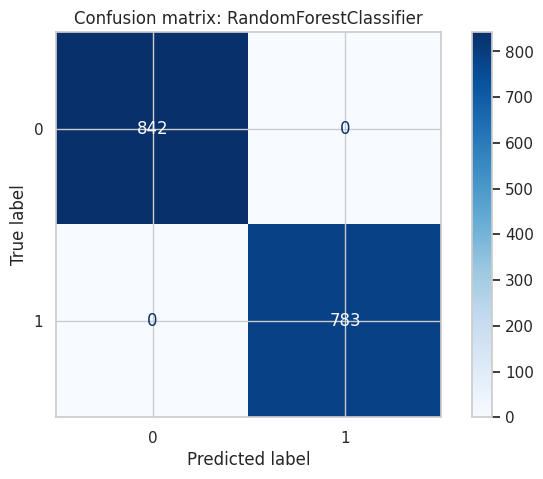

---- KNN ----
Model: KNeighborsClassifier
Accuracy: 0.9975384615384615
Precision: 0.9949174078780177
Recall: 1.0
F1: 0.9974522292993631

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       0.99      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



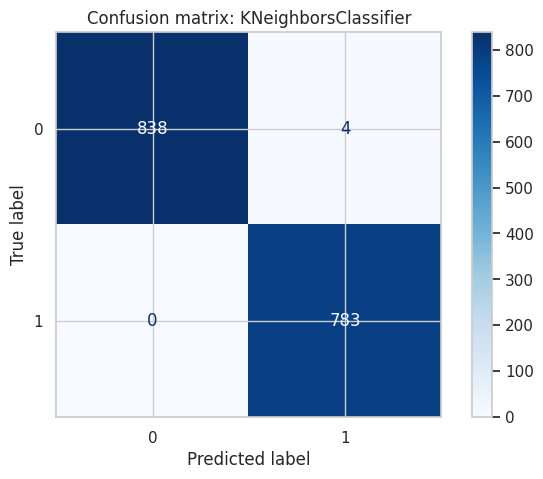

---- CategoricalNB ----
Model: CategoricalNB
Accuracy: 0.9458461538461539
Precision: 0.9901269393511989
Recall: 0.896551724137931
F1: 0.9410187667560321

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       842
           1       0.99      0.90      0.94       783

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



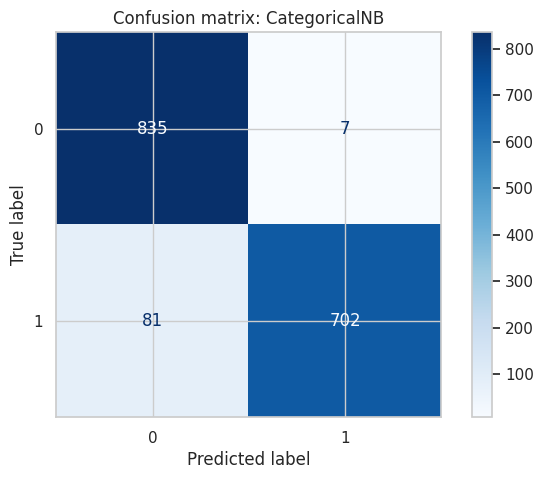

---- SVM ----
Model: SVC
Accuracy: 0.992
Precision: 0.9987046632124352
Recall: 0.9846743295019157
F1: 0.9916398713826367

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       842
           1       1.00      0.98      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



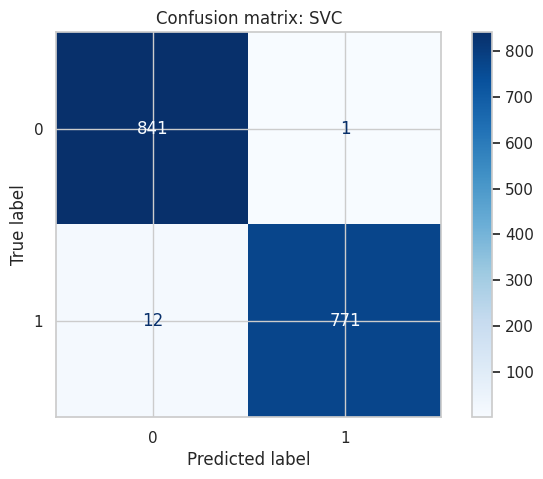

In [ ]:
results_le = []
# Ensure y_le_train/y_le_test are integers here because we label-encoded earlier
for name, model in models.items():
    # Skip CategoricalNB if data isn't integer (we have integers in data_le)
    try:
        print("----", name, "----")
        res = evaluate_model(model, X_le_train, X_le_test, y_le_train, y_le_test)
        res['name'] = name
        results_le.append(res)
    except Exception as e:
        print(f"Error running {name}: {e}")


## **Train & evaluate models (for one-hot features)**

---- KNN ----
Model: KNeighborsClassifier
Accuracy: 0.9987692307692307
Precision: 1.0
Recall: 0.9974457215836526
F1: 0.9987212276214834

Classification report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



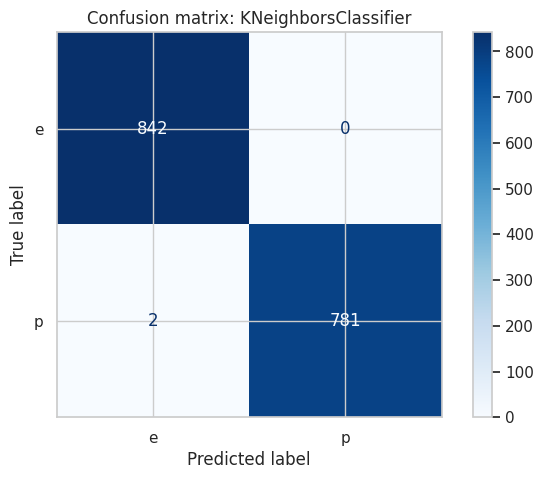

---- SVM ----
Model: SVC
Accuracy: 0.9987692307692307
Precision: 1.0
Recall: 0.9974457215836526
F1: 0.9987212276214834

Classification report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       842
           p       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



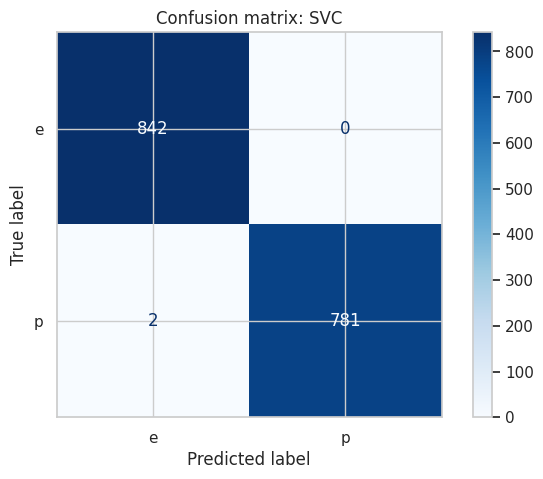

---- GaussianNB ----
Model: GaussianNB
Accuracy: 0.9563076923076923
Precision: 0.9188235294117647
Recall: 0.9974457215836526
F1: 0.9565217391304348

Classification report:
               precision    recall  f1-score   support

           e       1.00      0.92      0.96       842
           p       0.92      1.00      0.96       783

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



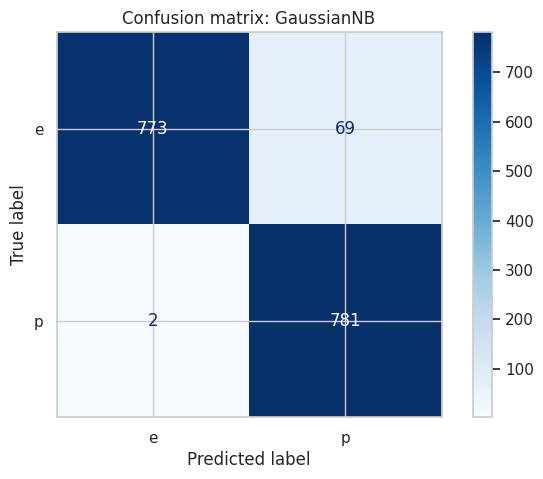

In [ ]:
# Scale one-hot features (StandardScaler)
scaler = StandardScaler(with_mean=False)  # with_mean=False for sparse data -->Setting with_mean=False tells the scaler not to subtract the mean, so it only scales by the standard deviation.
X_ohe_train_scaled = scaler.fit_transform(X_ohe_train)
X_ohe_test_scaled = scaler.transform(X_ohe_test)

results_ohe = []
# For models that benefit from OHE (KNN, SVM, maybe GaussianNB)
models_ohe = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "GaussianNB": GaussianNB()
}

for name, model in models_ohe.items():
    print("----", name, "----")
    try:
        res = evaluate_model(model, X_ohe_train_scaled, X_ohe_test_scaled, y_ohe_train, y_ohe_test)
        res['name'] = name
        results_ohe.append(res)
    except Exception as e:
        print(f"Error running {name}: {e}")


## **Compare results summary**

In [ ]:
# Collect and show results in DataFrame
res_df_le = pd.DataFrame([{k:v for k,v in r.items() if k in ['name','accuracy','precision','recall','f1']} for r in results_le])
res_df_ohe = pd.DataFrame([{k:v for k,v in r.items() if k in ['name','accuracy','precision','recall','f1']} for r in results_ohe])

print("Label-encoded results:")
display(res_df_le.sort_values('accuracy', ascending=False).reset_index(drop=True))
print("\nOne-hot results:")
display(res_df_ohe.sort_values('accuracy', ascending=False).reset_index(drop=True))


Label-encoded results:


,accuracy,precision,recall,f1,name
0,1.000000,1.000000,1.000000,1.000000,DecisionTree
1,1.000000,1.000000,1.000000,1.000000,RandomForest
2,0.997538,0.994917,1.000000,0.997452,KNN
3,0.992000,0.998705,0.984674,0.991640,SVM
4,0.945846,0.990127,0.896552,0.941019,CategoricalNB



One-hot results:


,accuracy,precision,recall,f1,name
0,0.998769,1.000000,0.997446,0.998721,KNN
1,0.998769,1.000000,0.997446,0.998721,SVM
2,0.956308,0.918824,0.997446,0.956522,GaussianNB


# **Feature importance (from Random Forest) & observations**

,0
odor,0.179853
gill-color,0.120372
spore-print-color,0.094561
gill-size,0.090216
ring-type,0.069856
stalk-root,0.062001
population,0.060761
bruises,0.053221
stalk-surface-above-ring,0.050686
gill-spacing,0.042342


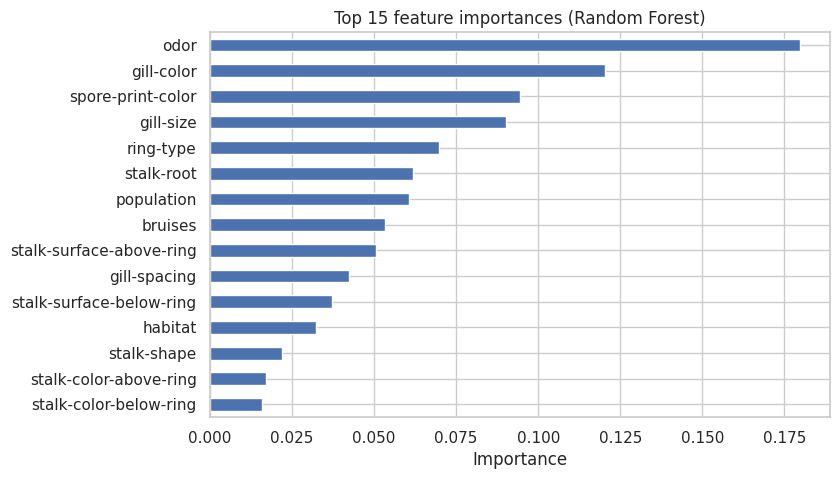

In [ ]:
# RandomForest was used with label-encoded features:
rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_le_train, y_le_train)
importances = rf.feature_importances_
feat_names = X_le.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
display(feat_imp.head(20))

# Plot top 15
feat_imp.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 feature importances (Random Forest)")
plt.xlabel("Importance")
plt.show()


# **visualizations**

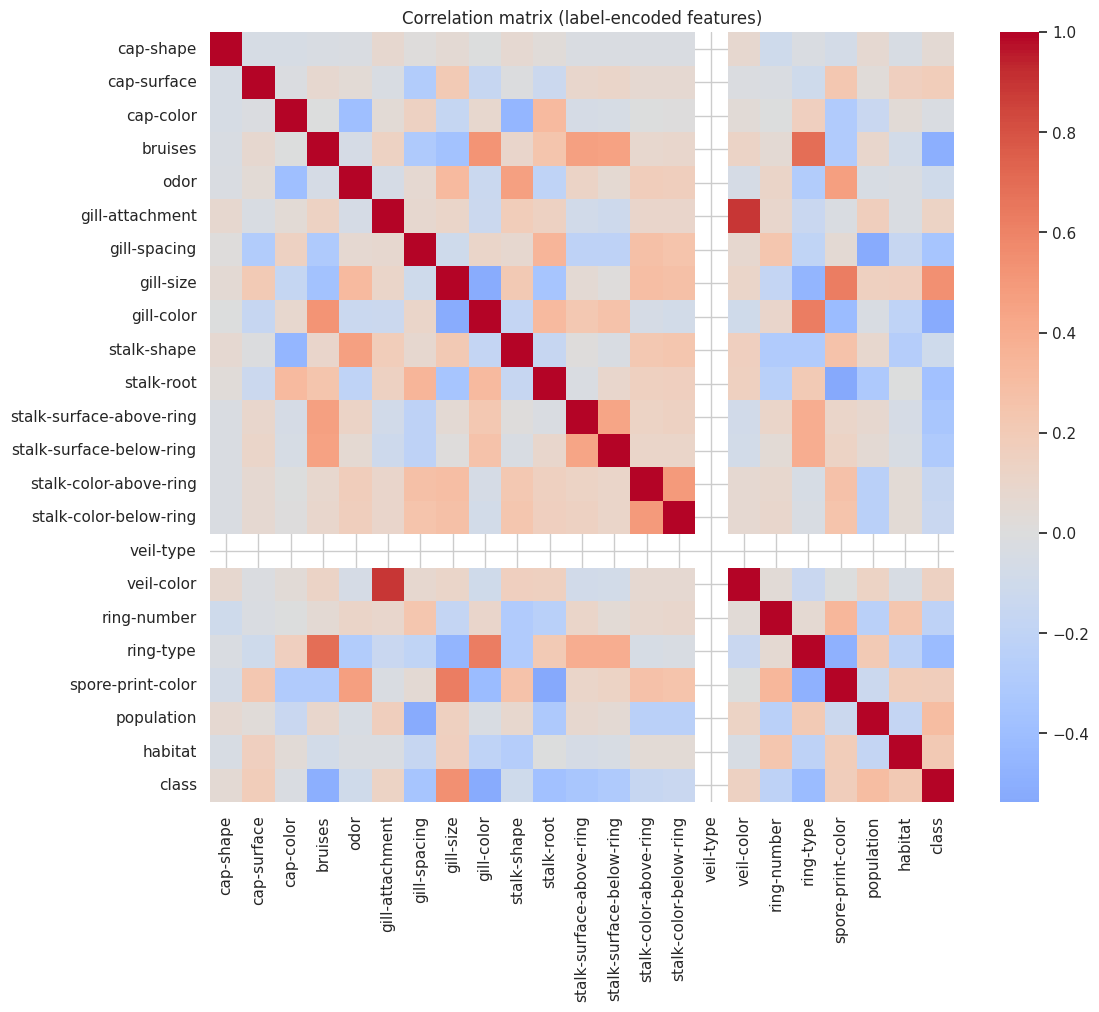

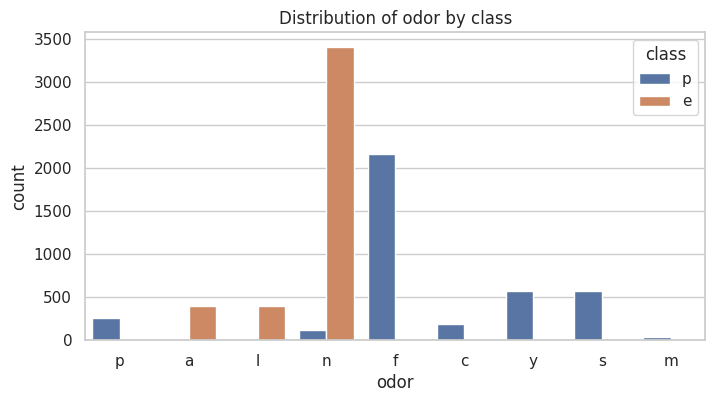

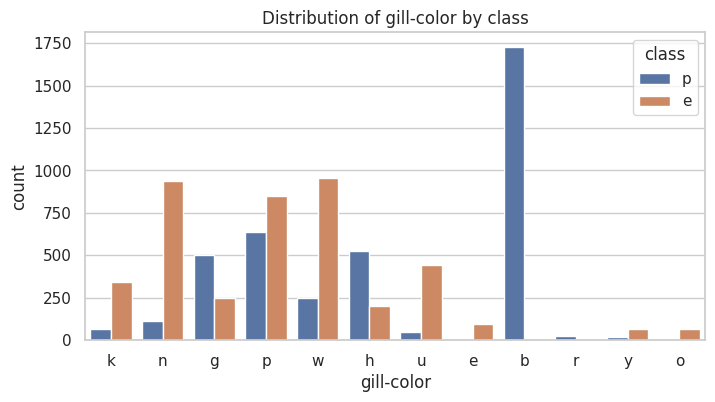

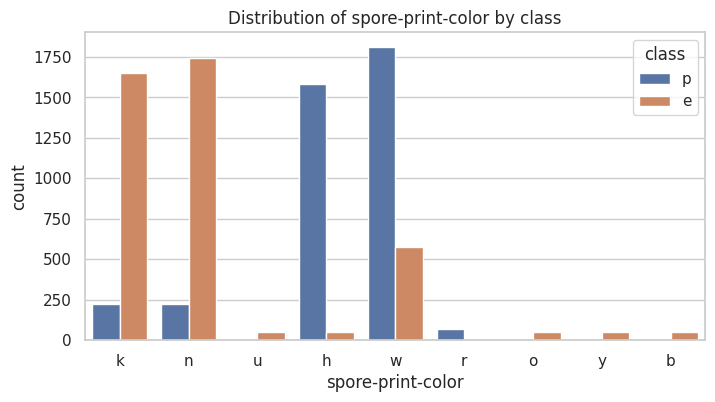

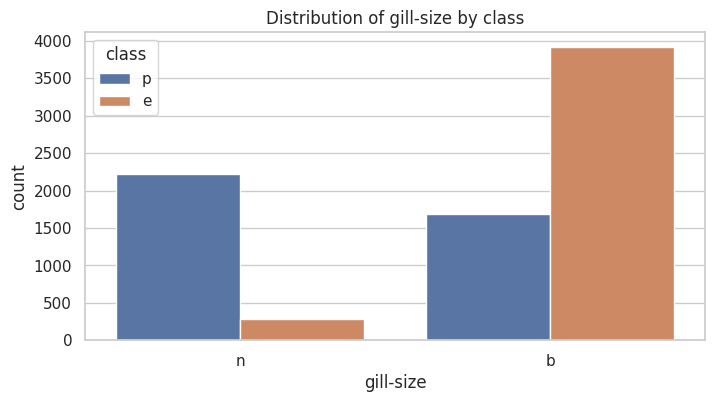

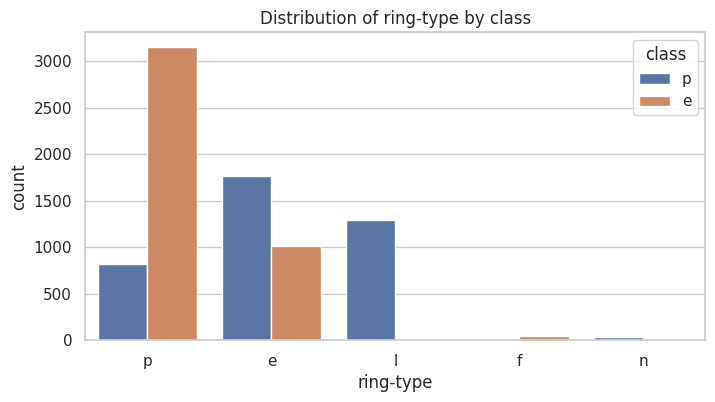

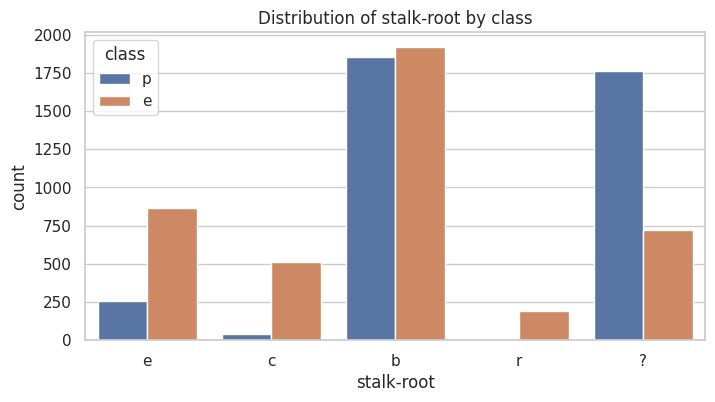

In [ ]:
# Correlation heatmap for label-encoded features (be careful: label encoding is ordinal-like)
corr = X_le.join(y_le := data_le['class']).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation matrix (label-encoded features)")
plt.show()

# Pairwise / box for top categorical features: show counts of top features vs class
top_feats = feat_imp.head(6).index.tolist()
for f in top_feats:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df[f], hue=df['class'])
    plt.title(f"Distribution of {f} by class")
    plt.show()


## **GridSearchCV**
(*The goal of GridSearchCV is to test many combinations of these hyperparameters to find the best performing one based on cross-validation results.*)
Best params: {'max_depth': None, 'n_estimators': 100}

Best params: {'max_depth': None, 'n_estimators': 100}
Best CV score: 0.9992308875557606
Model: RandomForestClassifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



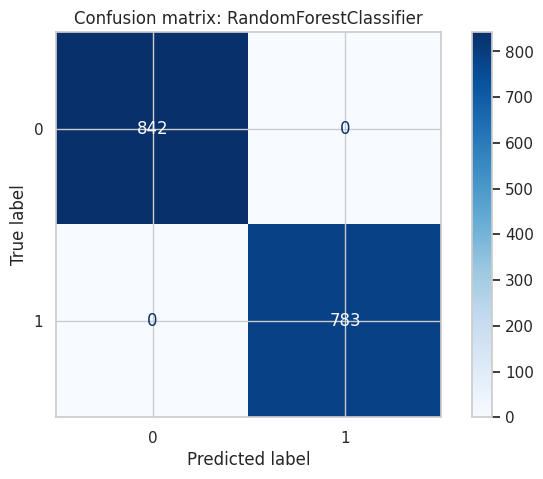

{'model': RandomForestClassifier(n_jobs=-1, random_state=42),
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0}

In [ ]:
# tune RandomForest max_depth and n_estimators
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
gs = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='accuracy', n_jobs=-1) #Cross-Validation (cv): Prevents overfitting to training data
gs.fit(X_le_train, y_le_train)
print("Best params:", gs.best_params_)
print("Best CV score:", gs.best_score_)
best_rf = gs.best_estimator_
evaluate_model(best_rf, X_le_train, X_le_test, y_le_train, y_le_test)


# **checks overfitting**

5-fold CV accuracy (RandomForest): [0.84246154 1.         1.         1.         0.58435961] mean: 0.8853642288745738
RF train acc: 1.0 test acc: 1.0


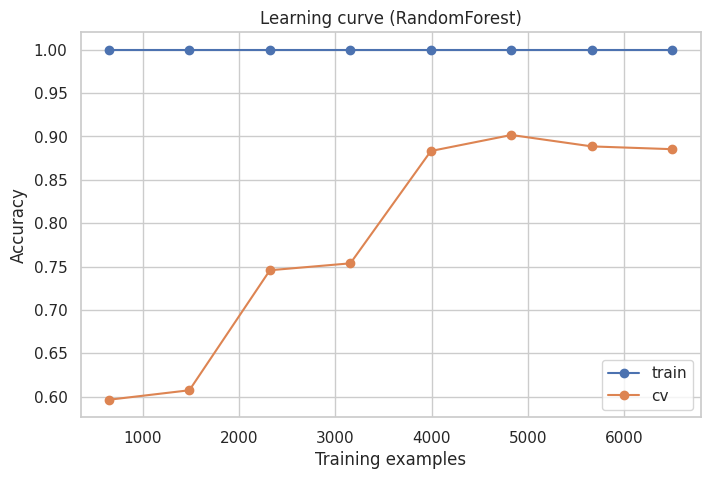

In [ ]:
# I already have: df, X_le_train, X_le_test, y_le_train, y_le_test, best_rf, models etc.

from sklearn.model_selection import cross_val_score, learning_curve

# Cross-validated score on the whole dataset (5-fold)
X_le = df.copy()
# label-encoded dataset `data_le` was created earlier; assume it's available as `data_le`
# if not, create it:

data_le = df.copy()
for c in data_le.columns:
    data_le[c] = LabelEncoder().fit_transform(data_le[c])

X = data_le.drop(columns=['class'])
y = data_le['class']

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("5-fold CV accuracy (RandomForest):", cv_scores, "mean:", cv_scores.mean())

# Compare train vs test accuracy for the RF you trained
train_acc = best_rf.score(X_le_train, y_le_train)
test_acc  = best_rf.score(X_le_test,  y_le_test)
print("RF train acc:", train_acc, "test acc:", test_acc)

# Learning curve (to inspect high-variance vs high-bias)
train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,8), scoring='accuracy', n_jobs=-1)
train_mean = train_scores.mean(axis=1)
test_mean  = test_scores.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='train')
plt.plot(train_sizes, test_mean, 'o-', label='cv')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning curve (RandomForest)')
plt.grid(True)
plt.show()


# **Permutation importance**

In [ ]:
# Feature importance (i already did this but run permutation importance too)
from sklearn.inspection import permutation_importance # Permutation Importance is a model-agnostic method to measure how much each feature contributes to the model’s predictions.

rf = best_rf
rf.fit(X_le_train, y_le_train)
importances = pd.Series(rf.feature_importances_, index=X_le_train.columns).sort_values(ascending=False)
print(importances.head(20))

# Permutation importance (more reliable)

perm = permutation_importance(rf, X_le_test, y_le_test, n_repeats=20, random_state=42, n_jobs=-1)
perm_importances = pd.Series(perm.importances_mean, index=X_le_test.columns).sort_values(ascending=False)
print("Top permutation importances:")
print(perm_importances.head(15))


odor                        0.193744
gill-color                  0.114487
spore-print-color           0.106751
gill-size                   0.098617
ring-type                   0.070559
stalk-root                  0.067075
population                  0.056547
stalk-surface-above-ring    0.052588
bruises                     0.046456
stalk-surface-below-ring    0.028409
habitat                     0.027418
gill-spacing                0.025004
stalk-color-above-ring      0.024496
ring-number                 0.019239
stalk-color-below-ring      0.017353
cap-color                   0.016126
stalk-shape                 0.015122
cap-surface                 0.009579
cap-shape                   0.003882
gill-attachment             0.003327
dtype: float64
Top permutation importances:
odor                        0.008646
spore-print-color           0.003846
gill-size                   0.001231
cap-color                   0.000000
cap-surface                 0.000000
cap-shape                   0.0

# **rebuild the encoded dataset**

In [ ]:
# Make a copy
df_encoded = df.copy()

# Apply LabelEncoder to every column
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Split into features and target
X_le = df_encoded.drop('class', axis=1)
y_le = df_encoded['class']

print("✅ Encoding complete!")
print("X_le types:\n", X_le.dtypes.head())


✅ Encoding complete!
X_le types:
 cap-shape      int64
cap-surface    int64
cap-color      int64
bruises        int64
odor           int64
dtype: object


# **drop “odor”**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Drop 'odor' from the encoded features
X_drop = X_le.drop(columns=['odor'])

# Run 5-fold cross validation
cv_scores_drop = cross_val_score(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    X_drop, y_le,
    cv=5, scoring='accuracy', n_jobs=-1
)

print("5-fold CV after dropping 'odor':", cv_scores_drop)
print("Mean accuracy:", cv_scores_drop.mean())


5-fold CV after dropping 'odor': [0.84246154 1.         1.         1.         0.58866995]
Mean accuracy: 0.886226297840091


# **NOTE**
“Odor” is the single most important feature
Removing it drastically reduces performance — which means the smell (odor) of a mushroom strongly determines whether it’s edible or poisonous.

Other features are somewhat helpful but not decisive.
Even without odor, the model still performs better than random (50%) — meaning shape, color, and gill characteristics carry some signal.

No overfitting issue here — the model simply lost crucial information when “odor” was removed



# **simple comparison plot**

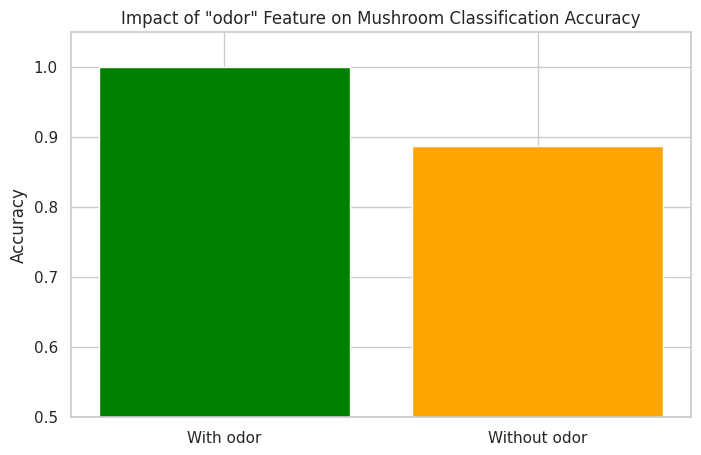

In [ ]:
acc_before = 1.0  # from my best model
acc_after = 0.886226297840091  # from result above

plt.bar(['With odor', 'Without odor'], [acc_before, acc_after], color=['green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Impact of "odor" Feature on Mushroom Classification Accuracy')
plt.ylim(0.5, 1.05)
plt.show()
